# IPND: Titanic Data Analysis Project
### By Anna Lee / March 2017 / [Kaggle](https://www.kaggle.com/c/titanic)

## Content
### [1 Introduction](#introduction)
1.1 Dataset<br>
1.2 Objective<br>
1.2.1 Questions<br>
1.3 Description<br>
1.3.1 How to explore<br>
### [2 Data Acquisition](#acquisition)
2.1 Import libraries<br>
2.2 Data loads<br>
2.2.1 Data problems<br>
### [3 Data Wrangling](#wrangling)
3.1 Filling missing values<br>
3.2 Fixing data types<br>
3.3 Changing a column name<br>
3.4 Changing labels<br>
### [4 Investigating the Data](#investigation)
4.1 Data description<br>
4.1.1 Data types<br>
4.1.2 Variable selection<br>
4.2 Exploratory Analysis<br>
### [5 Splitting out Survivers](#splitting)
5.1 Number of survivors<br>
5.2 Splitting<br>
5.2.1 Survivors' data<br>
5.2.2 Victims' data<br>
5.3 Comparing survivors with victims<br>
5.3.1 Mean age of survivors<br>
5.3.2 Gender ratio and SES difference<br>
5.3.3 Paid fare by each group<br>
### [6 Comparing Cabins and Passengers](#comparing)
6.1 Number of cabins and passengers<br>
6.2 Survival rate in both groups<br>
6.2.1 Number of surviving cabins and passengers<br>
6.2.2 Survival rate for cabins and passengers<br>
### [7 Finding Correlations with Survival](#correlations)
7.1 Family size<br>
7.1.1 Calculating correlation (Pearson's r)<br>
7.2 Fare and Age<br>
### [8 Conclusion](#conclusion)
8.1 Summary<br>
8.2 Discussion<br>
8.3 Limitations<br>

## Introduction <a id="introduction"></a>
### 1.1 Dataset
A training set - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

### 1.2 Objective
To know what factors made people more likely to survive
### 1.2.1 Questions
* Does the average age of survivors go below/above the mean age of passengers?
* which gender did survive more from the disaster?
* Which group does have higher survival rate?  Cabins or Passengers?
* Which socio-economic status do survivors belong to the most?
* Is family size(SibSp + Parch + 1) correlated to survival?
* Did passengers with siblings/spouses or parents/children survive more than single passengers?

### 1.3 Description
### 1.3.1 How to explore
* Investigating at least 3 variables by using both single-variable (1d) and multiple-variable (2d) explorations
* Conducting multiple comparisons
* Utilizing NumPy or Pandas functionality 
* Using statistical tests to draw rigorous conclusions 
* Relevant visualizations and statistical summaries

## Data Acquisition <a id="acquisition"></a>
### 2.1 Import libraries

In [1]:
# Imports moduels
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### 2.2 Data loads

In [2]:
# Reading CSV file
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


### 2.2.1 Data problems
1. There are missing values in Age and Cabin columns
2. Age's datatype is float
3. It needs more descriptive labels for Survived, Pclass, Cabin, and Embarked columns
4. Name of some columns including Pclass is not explicit

## Data Wrangling <a id="wrangling"></a>
Fixing the problems on data
### 3.1 Filling missing values
Number of missing values in each column

In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filling missing values is a better option than omitting rows in order to count the variables accurately later. Mean age has been input instead of 0 to prevent average age from significantly decreasing. 

In [4]:
# Filling missing variables with median value of Age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

Since the Cabin numbers are different one another, it would be better to call all of them Cabin. To do so, Cabin numbers have been changed to True and missing values have been changed to False. False refers to people who are not crews.

How to do: isnull function enables us to find NaN values. In this case, NaN transforms into True and the other values turn into False. And then they are reversed so that crews can be True and NaN values becomes False in Cabin column.

In [5]:
# In Cabin column, True = Cabin / False = Passenger
titanic_data['Cabin'] = titanic_data['Cabin'].isnull()
titanic_data['Cabin'] = titanic_data['Cabin'].apply(np.logical_not)

### 3.2 Fixing data types
Age datatype is more reasonable to be integer than float

In [6]:
# Rounding down float ages and Converting floats to ints in Age column
titanic_data['Age'] = titanic_data['Age'].apply(np.floor).astype('int64')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,False,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,True,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,False,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,True,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,False,S
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,False,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,True,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,False,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,False,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,False,C


### 3.3 Changing a column name
To know the precise meaning of columns

In [7]:
titanic_data = titanic_data.rename(columns={'Pclass':'Passenger_class'})
titanic_data = titanic_data.rename(columns={'Ticket':'Ticket_number'})
titanic_data = titanic_data.rename(columns={'Embarked':'Ports'})
titanic_data = titanic_data.rename(columns={'Survived':'Survival'})
titanic_data.head()

,PassengerId,Survival,Passenger_class,Name,Sex,Age,SibSp,Parch,Ticket_number,Fare,Cabin,Ports
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,False,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,True,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,False,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,True,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,False,S


### 3.4 Changing labels
To distinguish values clearly

In [8]:
titanic_data['Survival'] = titanic_data.Survival.map({0 : 'Died', 1 : 'Survived'})
titanic_data['Passenger_class'] = titanic_data.Passenger_class.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
titanic_data['Ports'] = titanic_data.Ports.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})
titanic_data['Cabin'] = titanic_data.Cabin.map({True: 'Cabin', False:'Passenger'})
titanic_data.head()

,PassengerId,Survival,Passenger_class,Name,Sex,Age,SibSp,Parch,Ticket_number,Fare,Cabin,Ports
0,1,Died,Third Class,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Passenger,Southampton
1,2,Survived,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,Cabin,Cherbourg
2,3,Survived,Third Class,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Passenger,Southampton
3,4,Survived,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,Cabin,Southampton
4,5,Died,Third Class,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Passenger,Southampton


## Investigating the Data <a id="investigation"></a>
### 4.1 Data description

* Survived: Survived (1) or died (0)
* Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd) 
* Sex: Sex  
* Age: Age in years  
* Sibsp: Number of siblings/spouses aboard the Titanic  
* Parch: Number of parents/children aboard the Titanic  
* Ticket: Ticket number  
* Fare: Passenger fare  
* Cabin: Cabin number  
* Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) 


### 4.1.1 Data types

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId        891 non-null int64
Survival           891 non-null object
Passenger_class    891 non-null object
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null int64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket_number      891 non-null object
Fare               891 non-null float64
Cabin              891 non-null object
Ports              889 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 83.6+ KB


### 4.1.2 Variable selection
For the analysis,
* Chosen variables: Survival, Passenger_class, Sex, Age, SibSp, Parch, Fare, Cabin
* Rejected variables: PassengerId, Name, Ticket_number, Ports

Reasons for rejection:
* PassengerId, Name, and Ticket_number has variety of values and it is hard to group them.
* It is difficult to think where passengers embarked is related to survival so Ports variable is rejected to be included. 

### 4.2 Exploratory Analysis
Checking summary statistics and pairwise correlation

In [10]:
# Summary statistics using numeric data
titanic_data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.345679,0.523008,0.381594,32.204208
std,257.353842,13.028212,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


* Categorical variables are not included in the statistics.
* Age range: 0~80
* Number of Sibling & Spouse: 0~8
* Number of Parents & Children: 0~6
* Fare range: 0~512

In [11]:
# Pairwise correlation of columns
titanic_data.corr()

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.034322,-0.057527,-0.001652,0.012658
Age,0.034322,1.000000,-0.233066,-0.172745,0.096838
SibSp,-0.057527,-0.233066,1.000000,0.414838,0.159651
Parch,-0.001652,-0.172745,0.414838,1.000000,0.216225
Fare,0.012658,0.096838,0.159651,0.216225,1.000000


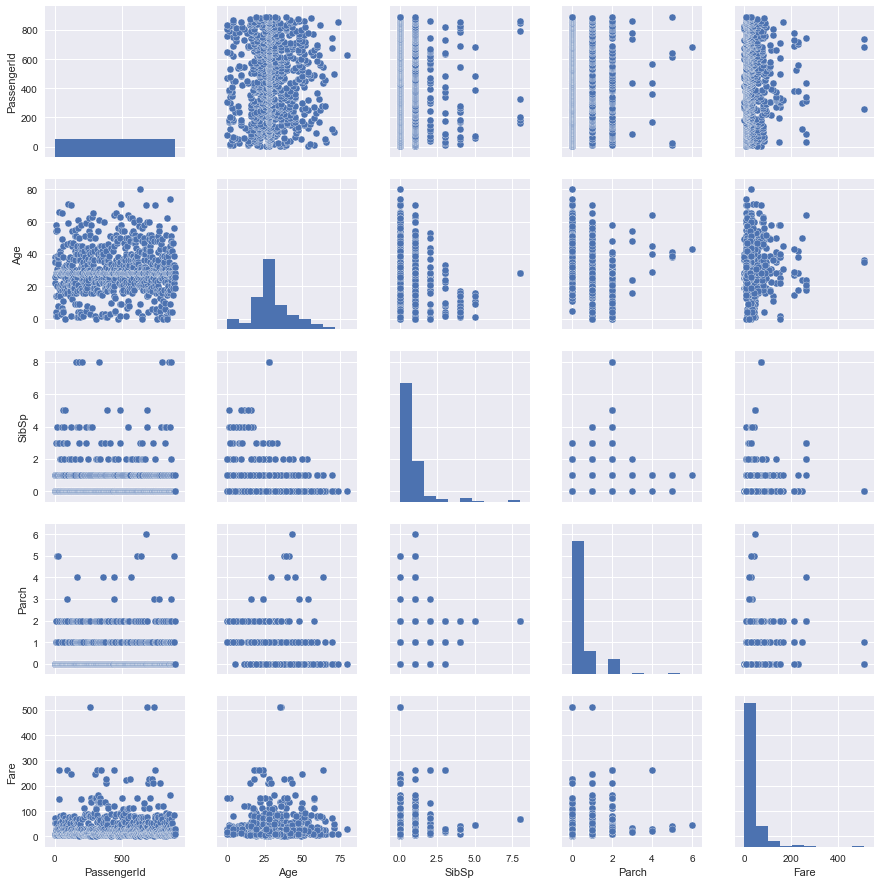

In [12]:
# Scatter plots
sns.pairplot(titanic_data)

* It's difficult to tell there is correlation between each numeric variable.

## Splitting out Survivers <a id="splitting"></a>
To figure out any differences between survivors and victims
### 5.1 Number of survivors

In [13]:
# Number of Survivors(1) and Nonsurvivors(0)
titanic_data.groupby('Survival').size()

Survival
Died        549
Survived    342
dtype: int64

### 5.2 Splitting

### 5.2.1 Survivors' data

In [14]:
# Get Survivors' data
survived_titanic = titanic_data[titanic_data.Survival == 'Survived']
survived_titanic.head()

,PassengerId,Survival,Passenger_class,Name,Sex,Age,SibSp,Parch,Ticket_number,Fare,Cabin,Ports
1,2,Survived,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,Cabin,Cherbourg
2,3,Survived,Third Class,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Passenger,Southampton
3,4,Survived,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,Cabin,Southampton
8,9,Survived,Third Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,Passenger,Southampton
9,10,Survived,Second Class,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,Passenger,Cherbourg


### 5.2.2 Victims' data

In [15]:
# Get data of passengers who did not survive
victims_titanic = titanic_data[titanic_data.Survival == 'Died']
victims_titanic.head()

,PassengerId,Survival,Passenger_class,Name,Sex,Age,SibSp,Parch,Ticket_number,Fare,Cabin,Ports
0,1,Died,Third Class,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Passenger,Southampton
4,5,Died,Third Class,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Passenger,Southampton
5,6,Died,Third Class,"Moran, Mr. James",male,28,0,0,330877,8.4583,Passenger,Queenstown
6,7,Died,First Class,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,Cabin,Southampton
7,8,Died,Third Class,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,Passenger,Southampton


### 5.3 Comparing survivors with victims
### 5.3.1 Mean age of survivors
To see which generation has survived more

In [16]:
# Checking mean age of overall passengers and survivors'
data1 = survived_titanic.describe().loc['mean', 'Age']
data2 = titanic_data.describe().loc['mean', 'Age']
mean_comparison = pd.DataFrame({"Survivors":[data1], "Overall":[data2]}, index=['Mean age'])
mean_comparison

,Overall,Survivors
Mean age,29.345679,28.274854


* Does the average age of survivors go below/above the mean age of passengers?
      Answer: Below

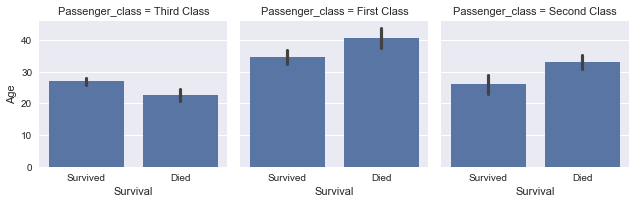

In [17]:
histogram_age = sns.FacetGrid(titanic_data, col='Passenger_class', size=3, aspect=1)
histogram_age.map(sns.barplot, 'Survival', 'Age');

* Analysis: These histograms indicates that survivors were generally younger than victims.

### 5.3.2 Gender ratio and SES difference
Did Gender or Passenger class matter to survival?
- Pclass(Ticket_class): A proxy for socio-economic status (SES)

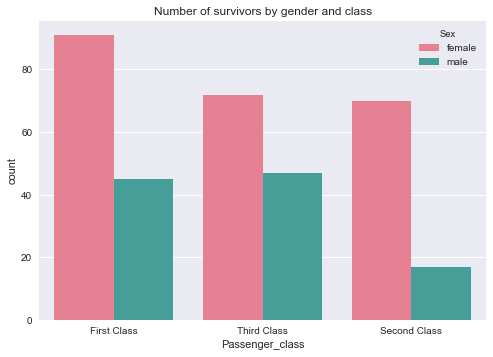

In [18]:
# Plot number of survivors by Sex and Ticket_class
plt.title("Number of survivors by gender and class")
sns.countplot(x='Passenger_class', hue='Sex', data=survived_titanic, palette='husl')

* Which gender did survive more from the disaster?
      Answer: Female
* Which socio-economic status do survivors belong to the most?
      Answer: First class

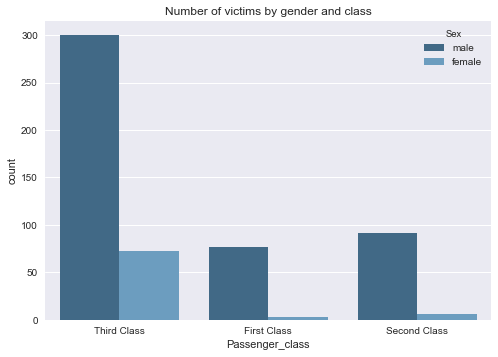

In [19]:
# Plot number of Victims by Sex and Ticket_class
plt.title("Number of victims by gender and class")
sns.countplot(x='Passenger_class', hue='Sex', data=victims_titanic, palette='Blues_d')

* Analysis: A significant portion of victims are Third-class men.

### 5.3.3 Paid fare by each group
To figure out the relationships between (Fare and Passenger class) or (Fare and Survival)

#### Average ticket price for each Passenger class

In [20]:
mean_price_survived_titanic = survived_titanic[['Passenger_class','Fare']].groupby('Passenger_class', as_index=False).mean()
mean_price_victims_titanic = victims_titanic[['Passenger_class','Fare']].groupby('Passenger_class', as_index=False).mean()
mean_price_survived_titanic = mean_price_survived_titanic.rename(columns={'Fare':'Survivors'})
mean_price_victims_titanic = mean_price_victims_titanic.rename(columns={'Fare':'Victims'})
mean_price_survived_titanic.head()

,Passenger_class,Survivors
0,First Class,95.608029
1,Second Class,22.055700
2,Third Class,13.694887


In [21]:
mean_price_victims_titanic.head()

,Passenger_class,Victims
0,First Class,64.684008
1,Second Class,19.412328
2,Third Class,13.669364


#### Merging 2 dataframes to create a plot
It inclues two different prices for each class 

In [22]:
merged = mean_price_survived_titanic.merge(mean_price_victims_titanic, on='Passenger_class', how='left')
merged = merged.set_index('Passenger_class')
merged.index.name = None
merged

,Survivors,Victims
First Class,95.608029,64.684008
Second Class,22.055700,19.412328
Third Class,13.694887,13.669364


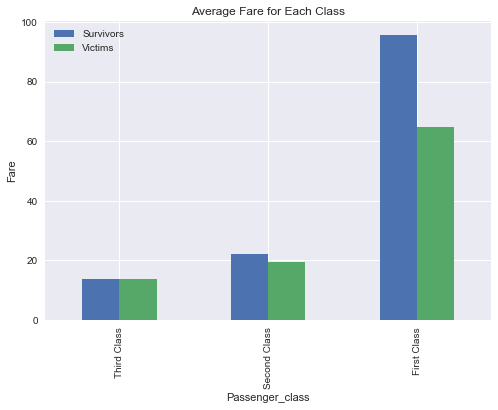

In [23]:
my_plot = merged.sort_values(by='Survivors').plot(kind='bar',legend=[''],title="Average Fare for Each Class")
my_plot.set_xlabel("Passenger_class")
my_plot.set_ylabel("Fare")

* Analysis: Survivors paid more for the ticket than others even though they are under the same class

## Comparing Cabins and Passengers <a id="comparing"></a>
Difference between Cabins and Passengers in terms of survival
### 6.1 Number of cabins and passengers

In [24]:
titanic_data.groupby('Cabin').size()

Cabin
Cabin        204
Passenger    687
dtype: int64

In [25]:
# Storing the numbers in variables
num_cabins = titanic_data[titanic_data.Cabin == 'Cabin']['Cabin'].count()
num_passengers = titanic_data[titanic_data.Cabin == 'Passenger']['Cabin'].count()
print num_cabins, num_passengers

204 687


### 6.2 Survival rate in both groups
Knowing survival rate instead of number of survivors is important because there is significant difference in total number of people.

### 6.2.1 Number of surviving cabins and passengers

In [26]:
# Number of surviving cabins
survived_cabins= survived_titanic[survived_titanic.Cabin == 'Cabin'] 
num_survived_cabins = len(survived_cabins)

# Number of surviving passengers
survived_passengers = survived_titanic[survived_titanic.Cabin == 'Passenger'] 
num_survived_passengers = len(survived_passengers)

print num_survived_cabins, num_survived_passengers

136 206


### 6.2.2 Survival rate for cabins and passengers

In [27]:
from __future__ import division
# Survival rate for Cabins
"{0:.02%}".format(num_survived_cabins/num_cabins)

'66.67%'

In [28]:
# Survival rate for Passengers
"{0:.02%}".format(num_survived_passengers/num_passengers)

'29.99%'

* Which group does have higher survival rate? Cabins or Passengers?
      Answer: Cabins.
              Cabins 66.67%
              Passengers 29.99%

## Finding Correlations with Survival <a id="correlations"></a>
To check if family size matters to survival
### 7.1 Family size

In [29]:
# Creating a Pandas Dataframe to calculate (SibSp + Parch + 1) 
family_members = pd.concat([titanic_data['PassengerId'], titanic_data['SibSp'], titanic_data['Parch']], axis=1, keys=['PassengerId', 'SibSp', 'Parch'])
family_members['Survival'] = titanic_data.Survival.map({'Died': 0, 'Survived': 1})
family_members.head()

# Adding a column named family size(SibSp + Parch + 1)
family_members['Family_size'] = family_members.SibSp + family_members.Parch + 1
family_members.head()

,PassengerId,SibSp,Parch,Survival,Family_size
0,1,1,0,0,2
1,2,1,0,1,2
2,3,0,0,1,1
3,4,1,0,1,2
4,5,0,0,0,1


### 7.1.1 Calculating correlation (Pearson's r)

In [30]:
def correlation(x,y):
    std_x = (x-x.mean())/x.std(ddof=0)
    std_y = (y-y.mean())/y.std(ddof=0)
    return (std_x*std_y).mean()
print correlation(family_members['Parch'], family_members['Survival'])
print correlation(family_members['SibSp'], family_members['Survival'])
print correlation(family_members['Family_size'], family_members['Survival'])

0.0816294070835
-0.0353224988857
0.0166389892827


* Is family size(SibSp + Parch + 1) correlated to survival?
      Answer: No, it is not correlated.
* Did passengers with siblings/spouses or parents/children survive more than single passengers?
      Answer: Number of parents or children(Parch) is a bit more correlated.
              i.e. Passengers who accompanied their parents or children, were more likely to survive.

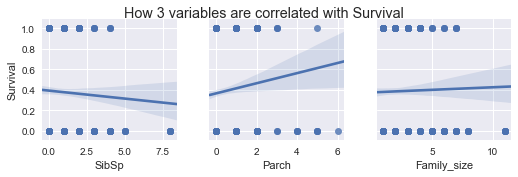

In [31]:
sns.pairplot(data=family_members, x_vars=['SibSp', 'Parch', 'Family_size'], y_vars='Survival', kind='reg')
plt.suptitle('How 3 variables are correlated with Survival')

* Analysis: 'Survived' and 'Parch' is relatively in direct proportion.
* Analysis: Family_size graph shows that single passengers and large families have similar survival rate.

### 7.2 Fare and Age

In [32]:
# Other correlations with numeric variables
print correlation(titanic_data['Age'], family_members['Survival'])
print correlation(titanic_data['Fare'], family_members['Survival'])

-0.0649089381669
0.257306522385


* Analysis: Fare is more correlated to Survival.

## Conclusion <a id="conclusion"></a>
### 8.1 Summary

1. Does the average age of survivors go below/above the mean age of overall passengers? (5.3.2)
        Answer: Below. On average, survivors are younger than victims
2. Histogram Analysis: It indicates that survivors were generally younger than victims.
3. Which gender did survive more from the disaster? (5.3.2)
        Answer: Female
4. Which socio-economic status do survivors belong to the most?
        Answer: First class
5. Histogram Analysis: A significant portion of victims are Third-class men.
6. Histogram Analysis: Survivors paid more for the ticket than others even though they are under the same class (5.3.3)
7. Which group does have higher survival rate? Cabins or Passengers? (6.2.2)
        Answer: Cabins.
                Cabins 66.67%
                Passengers 29.99%
8. Is family size(SibSp + Parch + 1) correlated to survival? (7.1.1)
        Answer: No, the variables are not strongly correlated.
                Correlation: 0.0166389892827.
9. Did passengers with siblings/spouses or parents/children survive more than single passengers?
        Answer: Number of parents or children(Parch) is a bit more correlated.
                Correlation: 0.0816294070835
10. Histogram Analysis: 'Survived' and 'Parch' is relatively in direct proportion
         i.e. Passengers who accompanied their parents or children, were more likely to survive.
11. Histogram Analysis: Family_size graph shows that single passengers and large families have similar survival rate.
12. Correlation Analysis: Fare is more correlated to Survival
         Correlation: 0.257306522385

### What factors made people more likely to survive?
It could be answered from the plots:
First class, Young age, Female, more paid Fare, accompanied Children or Parents

### 8.2 Discussion
- The surprising fact is that Cabins' survival rate was a lot higher than Passengers' survival rate(No.7). They must have either failed in their duties or known ways to survive contrary to others.
- I remembered the movie scenes guys were putting ladies on the life boats, so I could expect more females survived from the disaster(No.3) and the expectation was met.
- One more unexpected fact was that Fare is more correlated to survival(No.6, 12).
- There seems no variable to prove causation of the disaster or survival.

### 8.3 Limitations
- Some missing values in Age column are filled with mean age and also I had to round down float values to change them into integer values. 
- Thus, analysis about age is not 100 per cent perfect.
- It's not clear that why first class people could survive more than others and also why large number of third class men had to die. 
- Since I already knew about the titanic disaster, I expected conclusion first and analysed it instead of analysing first and then drawing conclusions. It might prevent me from analysing it from a variety of perspectives.
- If there was information about which deck of the ship people were staying in or whether or not people could be on lifeboats, it would be more helpful to analyse how people survivied.
- This is a sample dataset(891 out of 2224 passengers and crews). Less than half of the real data may be biased.